In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1920 non-null   int64  
 1   Substrate  1920 non-null   object 
 2   Ceramic    1920 non-null   object 
 3   Thickness  1920 non-null   float64
 4   Lsub       1920 non-null   float64
 5   asub       1920 non-null   float64
 6   bsub       1920 non-null   float64
 7   Lcer       1920 non-null   float64
 8   acer       1920 non-null   float64
 9   bcer       1920 non-null   float64
 10  L          1920 non-null   float64
 11  a          1920 non-null   float64
 12  b          1920 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 195.1+ KB


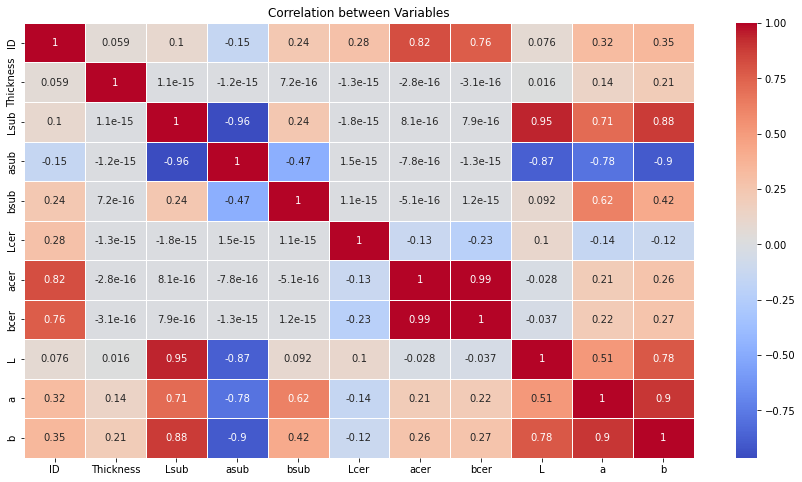

In [2]:
import seaborn as sns
corr_df = df.corr()
plt.figure(figsize=(15,8))
plt.title("Correlation between Variables")
sns.heatmap(corr_df, linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

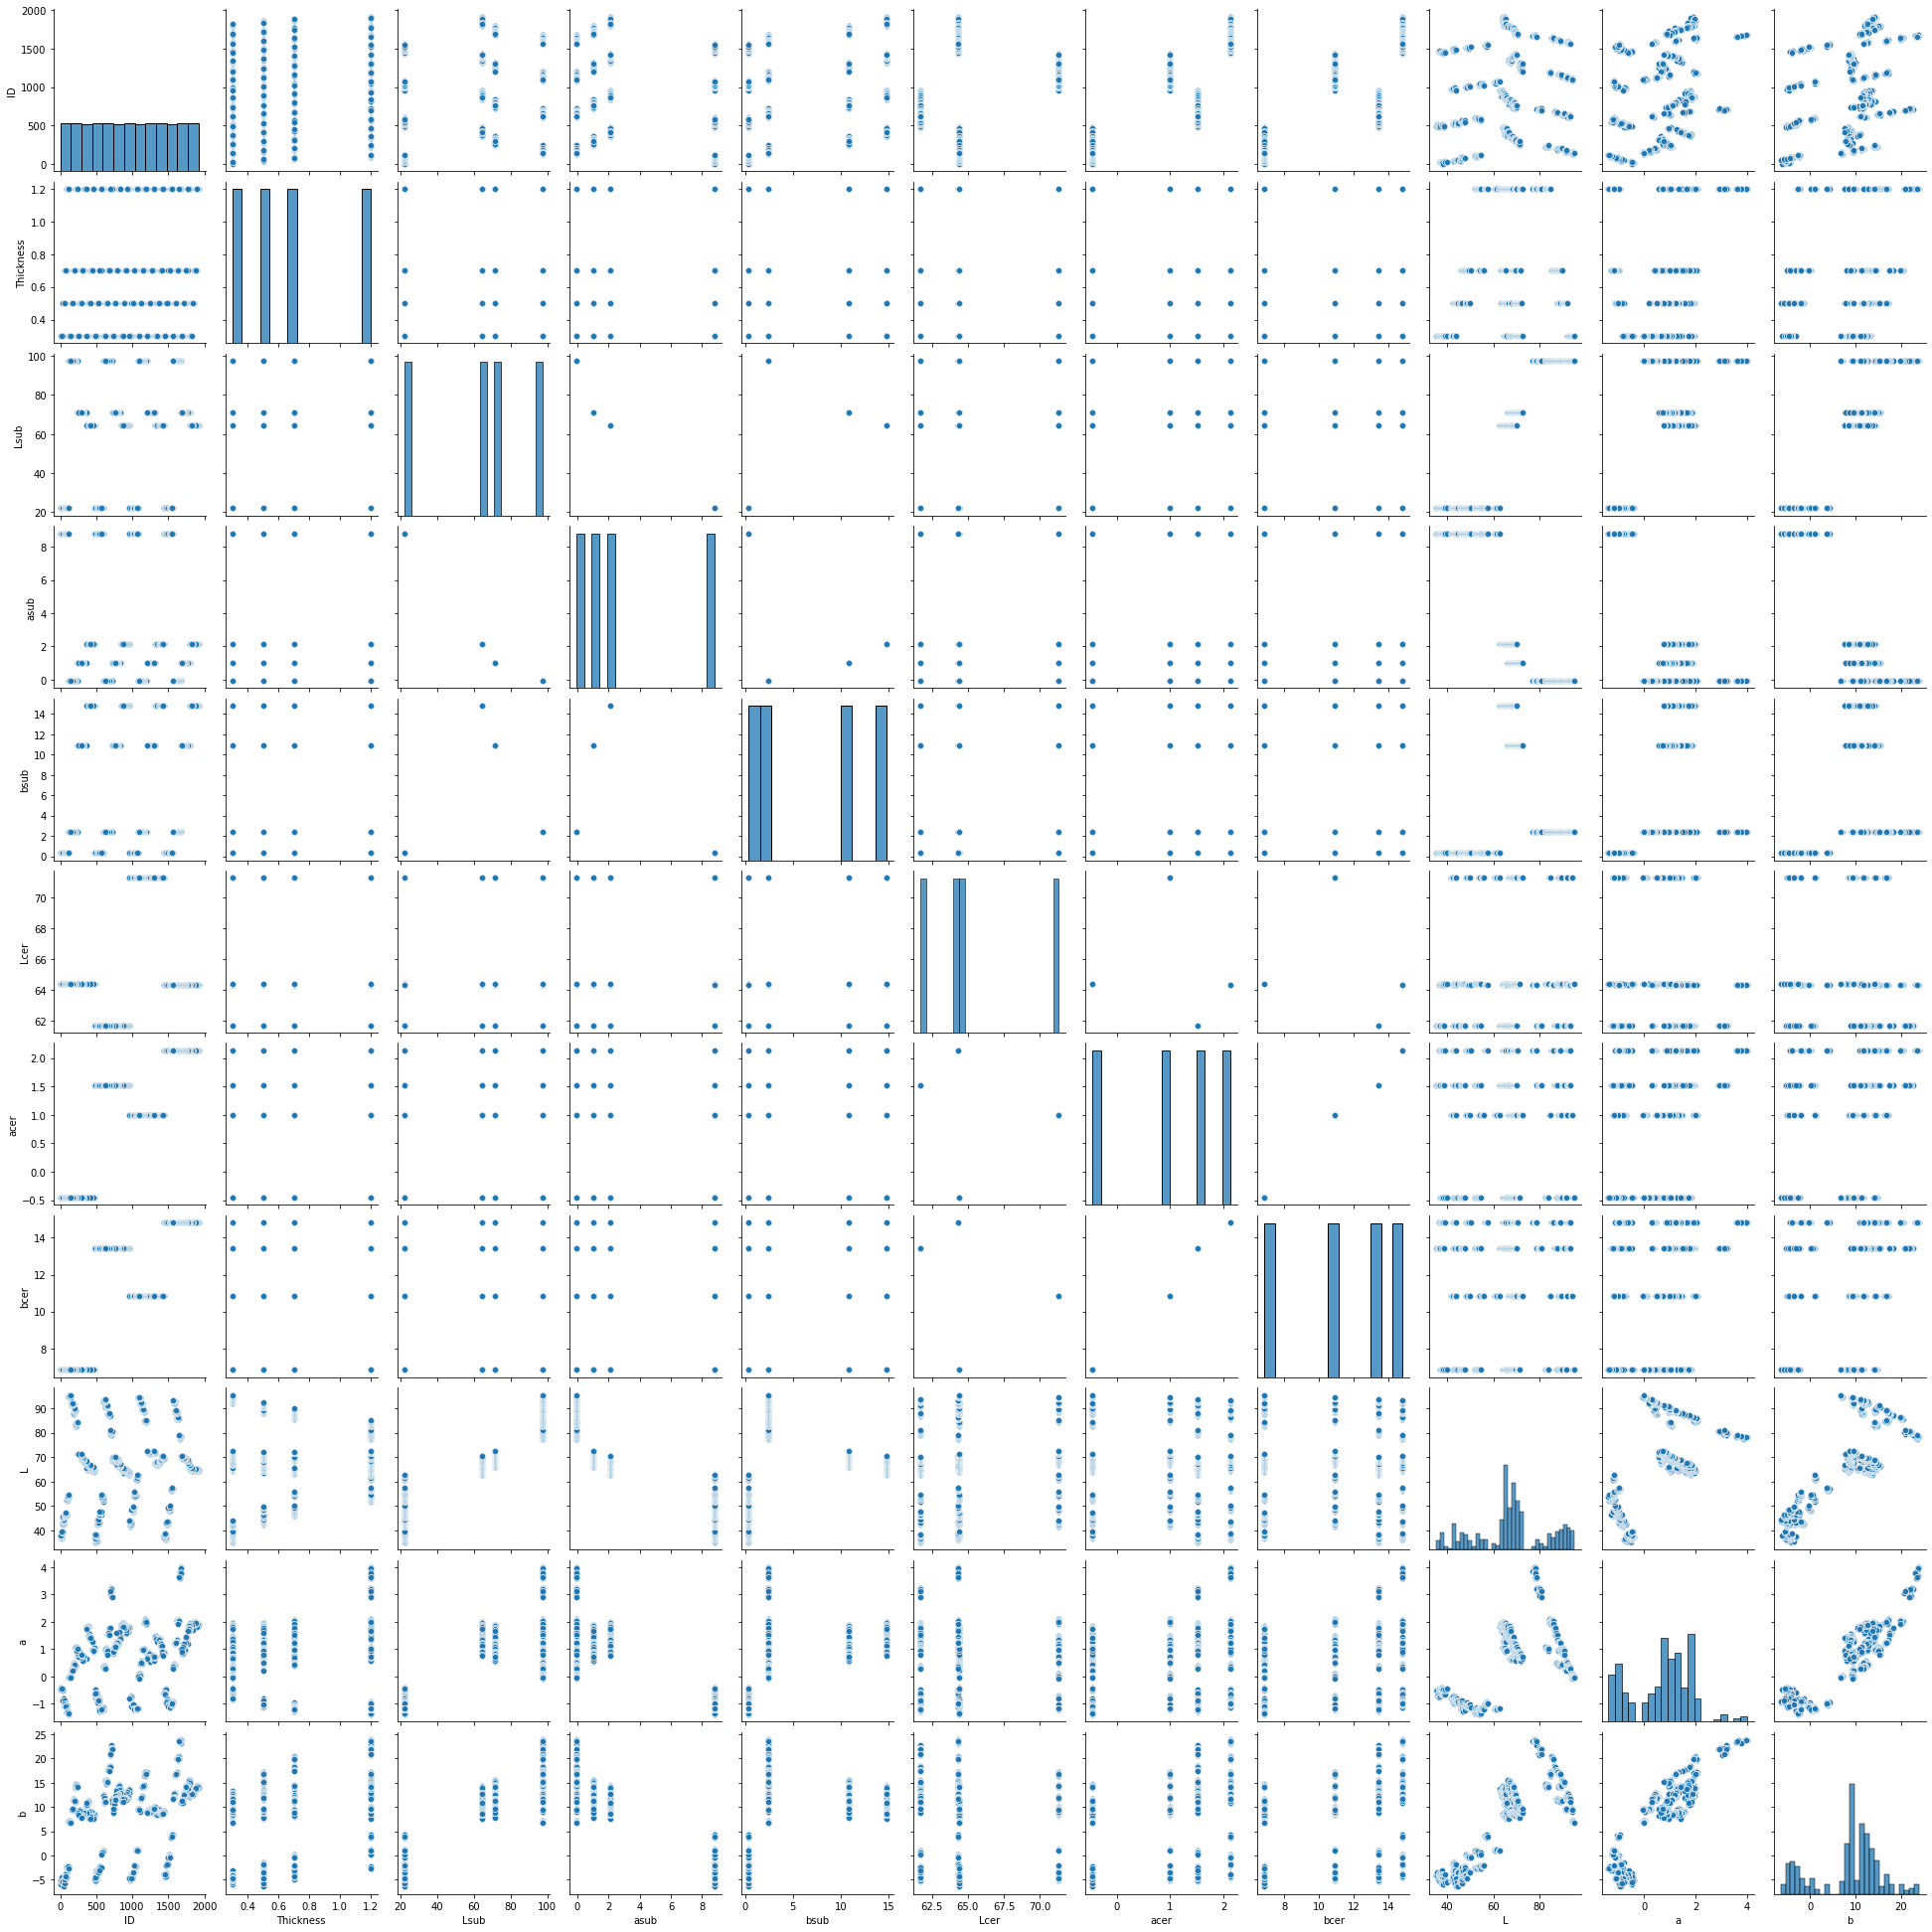

In [3]:
sns.pairplot(df)

In [4]:
#Lsub seems to be highly correlate with the final L, a and b

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import cross_val_score

X, y = df[['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']], df[['L','a','b']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = make_pipeline(StandardScaler(), Ridge())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
model = make_pipeline(StandardScaler(), Lasso())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

num_of_features = []
pipe = model

for i in range (1, 7):
    sfs = SFS(pipe,
         n_features_to_select= i,
         direction='forward',
         scoring='r2',
         n_jobs=3,
         cv=5)
    sfs.fit(X_train, y_train)
    features = sfs.get_support(indices=True)
    X.iloc[:, features]
    
    r2_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="r2", cv=5)
    mean_r2_train = np.mean(r2_train)
    
    r2_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="r2", cv=5)
    mean_r2_test = np.mean(r2_test)
    
    mse_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_squared_error", cv=5)
    mean_mse_train = np.mean(mse_train)
    
    mse_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_squared_error", cv=5)
    mean_mse_test = np.mean(mse_test)
    
    mae_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_train = np.mean(mae_train)
    
    mae_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_test = np.mean(mae_test)
    
    d = {'n_features': i, 'R2_train': mean_r2_train, 'R2_test': mean_r2_test, 'MSE_train': mean_mse_train, 
         'MSE_test': mean_mse_test, 'MAE_train': mean_mae_train, 'MAE_test': mean_mae_test} 
    num_of_features.append(d)

In [ ]:
n_features_data = pd.DataFrame(num_of_features)
n_features_data

In [ ]:
pd.DataFrame(data=model[1].coef_, index=['L','a','b'], columns=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'])

In [ ]:
coefs = pd.DataFrame(data=model[1].coef_, index=['L','a','b'], columns=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'])
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [ ]:
# Fitting the Linear Model to the Training set
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
pred = pd.DataFrame(data=Predictions, columns=['Lpred','apred','bpred'])
pred

In [ ]:
sns.regplot(y_test['L'], pred['Lpred'])

In [ ]:
sns.regplot(y_test['a'], pred['apred'])

In [ ]:
sns.regplot(y_test['b'], pred['bpred'])

In [30]:
# create dataset
X, y = pd.DataFrame(df[['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']]).to_numpy(), pd.DataFrame(df[['L','a','b']]).to_numpy()
# summarize shape
print(X_train.shape, y_train.shape)

(1344, 7) (1344, 3)


In [29]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

# get the dataset
def get_dataset():
    
    X, y = pd.DataFrame(df[['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']]).to_numpy(), pd.DataFrame(df[['L','a','b']]).to_numpy()
    return X, y

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results

# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

>1.369
>1.430
>1.374
>1.294
>1.305
>1.130
>1.484
>1.330
>1.300
>1.223
>1.292
>1.279
>1.544
>1.491
>1.157
>1.138
>1.301
>1.542
>1.358
>1.456
>1.720
>1.321
>1.414
>1.219
>1.445
>1.285
>1.005
>1.549
>1.371
>1.449
MAE: 1.352 (0.146)


In [31]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [34]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)  

/var/folders/rr/ffp1c_lx2xvc_cg2t0j672740000gn/T/ipykernel_87455/3842346445.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model =  KerasRegressor(build_fn=createmodel, verbose = False)


In [50]:
activation_funcs = ['relu'] 
loss_funcs = ['mean_squared_error']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [2,5,10,15], last_layer_nodes = [2,5,10,15],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [10,15,20], epochs = [10,15,20])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [51]:
grid.fit(X,y)

KeyboardInterrupt: 

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring='r2', 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

In [ ]:
activation_funcs = ['sigmoid', 'relu', 'tanh'] 
loss_funcs = ['mean_squared_error','hinge']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100], epochs = [20,60])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [ ]:
grid.fit(X,y)

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 20, verbose=0)
 

Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['L']=y_test_orig
TestingData['PredictedL']=Predictions
TestingData.head()

In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['L']-TestingData['PredictedL'])/TestingData['L'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(TestingData['L'], TestingData['PredictedL'], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(TestingData['L'], TestingData['APE'], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("APE")
plt.show()

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split the data into test and training sets.

x_label = ['Lsub','asub', 'bsub', 'Lcer','acer','bcer', 'Thickness']
y_label = ['L']
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(df[x_label],df[y_label],test_size=0.2)
# Print the dimensions
print('Training set dimensions X, y: ' + str(X_train.shape) + ' ' +str(y_train.shape))
print('Test set dimensions X, y: ' + str(X_test.shape) + ' '+ str(y_test.shape))

In [ ]:
# Define regression model in Keras
def regression_model():
    # Define model
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy'])
    
    return model

# Use KerasRegressor wrapper (from Keras to sklearn)
# The packages we use are meant to be run with sklearn models
estimator = KerasRegressor(build_fn=regression_model, validation_split = 0.2, batch_size=100, epochs=100, verbose=0)
history = estimator.fit(X_train, y_train)

In [ ]:
# summarize history loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
# Split the data into test and training sets.

x_label = ['Lsub','asub', 'bsub', 'Lcer','acer','bcer', 'Thickness']
y_label = ['L','a','b']
X_train, X_test, y_train, y_test = train_test_split(df[x_label],df[y_label],test_size=0.2)
# Print the dimensions
print('Training set dimensions X, y: ' + str(X_train.shape) + ' ' +str(y_train.shape))
print('Test set dimensions X, y: ' + str(X_test.shape) + ' '+ str(y_test.shape))

In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

# get the dataset
def get_dataset():
    x_label = ['Lsub','asub', 'bsub', 'Lcer','acer','bcer', 'Thickness']
    y_label = ['L','a','b']
    X, y = df[x_label], df[y_label]
    return X, y
# summarize shape
print(X.shape, y.shape)

In [ ]:
# Split the data into test and training sets.

x_label = ['Lsub','asub', 'bsub', 'Lcer','acer','bcer', 'Thickness']
y_label = ['L','a','b']
X_train, X_test, y_train, y_test = train_test_split(df[x_label],df[y_label],test_size=0.2)
# Print the dimensions
print('Training set dimensions X, y: ' + str(X_train.shape) + ' ' +str(y_train.shape))
print('Test set dimensions X, y: ' + str(X_test.shape) + ' '+ str(y_test.shape))

In [ ]:
# Define regression model in Keras
def regression_model():
    # Define model
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy'])
    return model

# Use KerasRegressor wrapper (from Keras to sklearn)
# The packages we use are meant to be run with sklearn models
estimator = KerasRegressor(build_fn=regression_model, validation_split = 0.2, batch_size=100, epochs=100, verbose=0)
history = estimator.fit(X_train, y_train)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return estimator.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

In [ ]:
# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=0, epochs=100)
# make a prediction for new data
row = []
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])